Name :Pratham Shewale Class: TE-B Roll_no: 22618

In [5]:
import torch
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-6 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


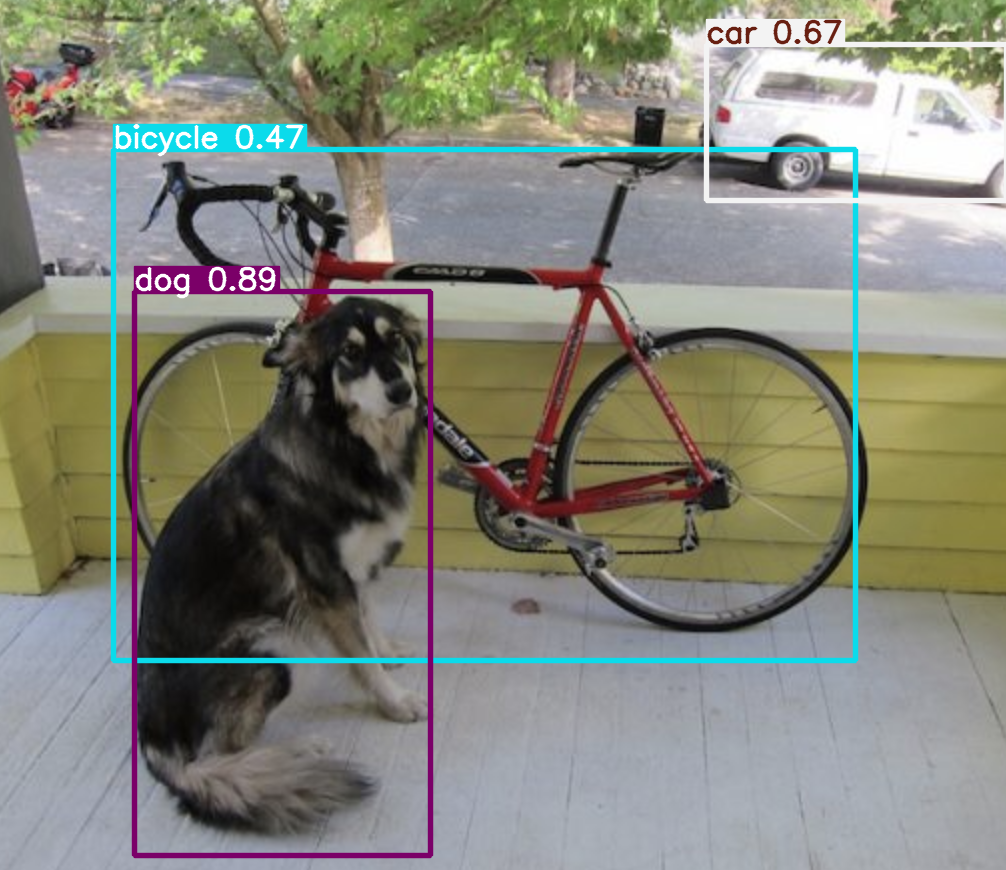

         xmin        ymin         xmax        ymax  confidence  class     name
0  134.958206  291.829987   430.687317  855.610840    0.889777     16      dog
1  706.661011   44.444019  1006.000000  200.316879    0.671866      2      car
2  113.025955  149.265564   855.361145  660.300903    0.472016      1  bicycle


In [4]:
# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Correct repository
model.conf = 0.25  # Set confidence threshold

def detect_objects(image_path):
    """Detect objects in an image using YOLOv5."""
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return None
    image = Image.open(image_path).convert("RGB")  # Ensure correct format
    results = model(image)  # Perform inference
    results.show()

    detections = results.pandas().xyxy[0]  # Get bounding boxes
    if detections.empty:
        print("No objects detected.")
        return None

    return detections

def plot_detections(image_path, detections):
    """Plot detected objects on the image."""
    if detections is None:
        print("No objects to plot.")
        return
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} ({row['confidence']:.2f})"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw.text((x1, y1 - 10), label, fill="green", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    image_path = "/content/unnamed.png"  # Ensure this file exists in the working directory
    detections = detect_objects(image_path)
    if detections is not None:
        print(detections)
        plot_detections(image_path, detections)
